# Support Vector Machine Assignment 3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MasteriNeuron/dummy/main/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
new = df['size'].str.split(" ", n = 1, expand = True)

In [6]:
df['size'] = new[0]

In [7]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [8]:
df['size'].fillna(0)

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13320, dtype: object

In [9]:
df['size'] = df['size'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  float64
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [11]:
# df_cat = df.select_dtypes(np.object)
# df_num = df.select_dtypes(np.number)

In [12]:
def convert_sqft_to_num(x):
    tokens = x.split(' - ')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)


In [13]:
df = df.dropna(subset=['total_sqft'])

In [14]:
df['total_sqft_zscore'] = (df['total_sqft'] - df['total_sqft'].mean()) / df['total_sqft'].std()
df = df[(df['total_sqft_zscore'] <= 3) & (df['total_sqft_zscore'] >= -3)]
df = df.drop('total_sqft_zscore', axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13156 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13156 non-null  object 
 1   availability  13156 non-null  object 
 2   location      13155 non-null  object 
 3   size          13140 non-null  float64
 4   society       7753 non-null   object 
 5   total_sqft    13156 non-null  float64
 6   bath          13085 non-null  float64
 7   balcony       12591 non-null  float64
 8   price         13156 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.0+ MB


In [16]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [17]:
df['area_type'] = df['area_type'].replace({'Super built-up  Area':1,'Built-up  Area':2,'Plot  Area':3,'Carpet  Area':4})

In [18]:
df['area_type'] = df['area_type'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13156 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13156 non-null  int64  
 1   availability  13156 non-null  object 
 2   location      13155 non-null  object 
 3   size          13140 non-null  float64
 4   society       7753 non-null   object 
 5   total_sqft    13156 non-null  float64
 6   bath          13085 non-null  float64
 7   balcony       12591 non-null  float64
 8   price         13156 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.0+ MB


In [20]:
df = df.drop('availability',axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13156 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13156 non-null  int64  
 1   location    13155 non-null  object 
 2   size        13140 non-null  float64
 3   society     7753 non-null   object 
 4   total_sqft  13156 non-null  float64
 5   bath        13085 non-null  float64
 6   balcony     12591 non-null  float64
 7   price       13156 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 925.0+ KB


In [22]:

df[['area']] = df['location'].str.split(',')[0]
df[['city']] = df['location'].str.split(',')[1] 
df = df.drop('location', axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13156 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13156 non-null  int64  
 1   size        13140 non-null  float64
 2   society     7753 non-null   object 
 3   total_sqft  13156 non-null  float64
 4   bath        13085 non-null  float64
 5   balcony     12591 non-null  float64
 6   price       13156 non-null  float64
 7   area        13156 non-null  object 
 8   city        13156 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.5+ MB


In [24]:
df.head()

,area_type,size,society,total_sqft,bath,balcony,price,area,city
0,1,2.0,Coomee,1056.0,2.0,1.0,39.07,Electronic City Phase II,Chikka Tirupathi
1,3,4.0,Theanmp,2600.0,5.0,3.0,120.00,Electronic City Phase II,Chikka Tirupathi
2,2,3.0,NaN,1440.0,2.0,3.0,62.00,Electronic City Phase II,Chikka Tirupathi
3,1,3.0,Soiewre,1521.0,3.0,1.0,95.00,Electronic City Phase II,Chikka Tirupathi
4,1,2.0,NaN,1200.0,2.0,1.0,51.00,Electronic City Phase II,Chikka Tirupathi


In [25]:
df.tail()

,area_type,size,society,total_sqft,bath,balcony,price,area,city
13315,2,5.0,ArsiaEx,3453.0,4.0,0.0,231.0,Electronic City Phase II,Chikka Tirupathi
13316,1,4.0,NaN,3600.0,5.0,NaN,400.0,Electronic City Phase II,Chikka Tirupathi
13317,2,2.0,Mahla T,1141.0,2.0,1.0,60.0,Electronic City Phase II,Chikka Tirupathi
13318,1,4.0,SollyCl,4689.0,4.0,1.0,488.0,Electronic City Phase II,Chikka Tirupathi
13319,1,1.0,NaN,550.0,1.0,1.0,17.0,Electronic City Phase II,Chikka Tirupathi


In [26]:
df['area'].unique()

array(['Electronic City Phase II'], dtype=object)

In [27]:
df['area'] = df['area'].replace({'Electronic City Phase II':1})
df['city'] = df['city'].replace({'Chikka Tirupathi':1})

In [28]:
df['area'] = df['area'].astype(int)
df['city'] = df['city'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13156 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13156 non-null  int64  
 1   size        13140 non-null  float64
 2   society     7753 non-null   object 
 3   total_sqft  13156 non-null  float64
 4   bath        13085 non-null  float64
 5   balcony     12591 non-null  float64
 6   price       13156 non-null  float64
 7   area        13156 non-null  int64  
 8   city        13156 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.5+ MB


In [30]:
df = df.drop('society',axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13156 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13156 non-null  int64  
 1   size        13140 non-null  float64
 2   total_sqft  13156 non-null  float64
 3   bath        13085 non-null  float64
 4   balcony     12591 non-null  float64
 5   price       13156 non-null  float64
 6   area        13156 non-null  int64  
 7   city        13156 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.4 MB


In [32]:
df.describe()

,area_type,size,total_sqft,bath,balcony,price,area,city
count,13156.000000,13140.000000,13156.000000,13085.000000,12591.000000,13156.000000,13156.0,13156.0
mean,1.497644,2.782725,1490.475440,2.666641,1.584306,105.507624,1.0,1.0
std,0.765412,1.249543,721.043959,1.286405,0.815081,109.099993,0.0,0.0
min,1.000000,1.000000,1.000000,1.000000,0.000000,8.000000,1.0,1.0
25%,1.000000,2.000000,1100.000000,2.000000,1.000000,50.000000,1.0,1.0
50%,1.000000,3.000000,1270.000000,2.000000,2.000000,70.800000,1.0,1.0
75%,2.000000,3.000000,1660.000000,3.000000,2.000000,120.000000,1.0,1.0
max,4.000000,43.000000,5270.000000,40.000000,3.000000,2600.000000,1.0,1.0


In [33]:
# pip install matplotlib==3.6.0 --force-reinstall

### Visualization Distribution of Price

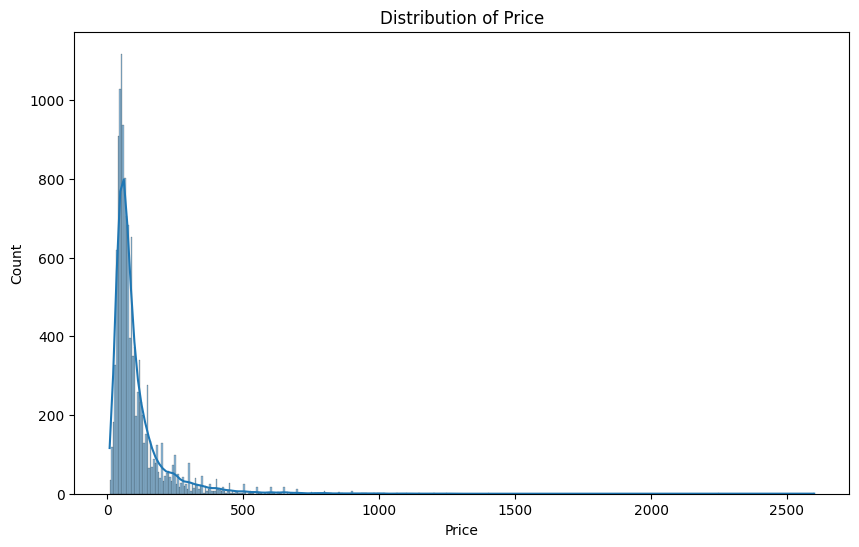

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

### Visualization corelation between features

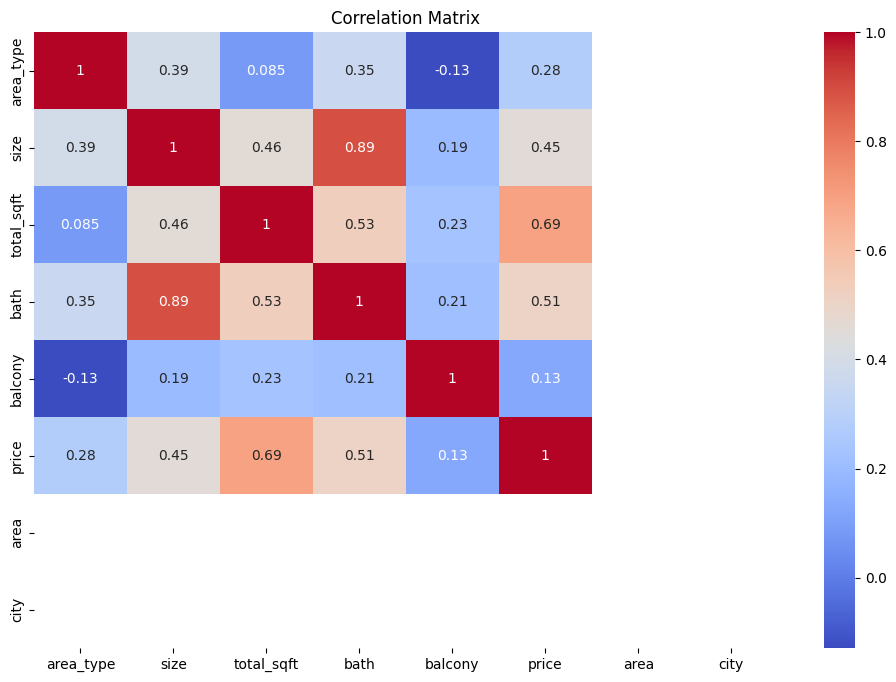

In [35]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Visualization Count of Area Types

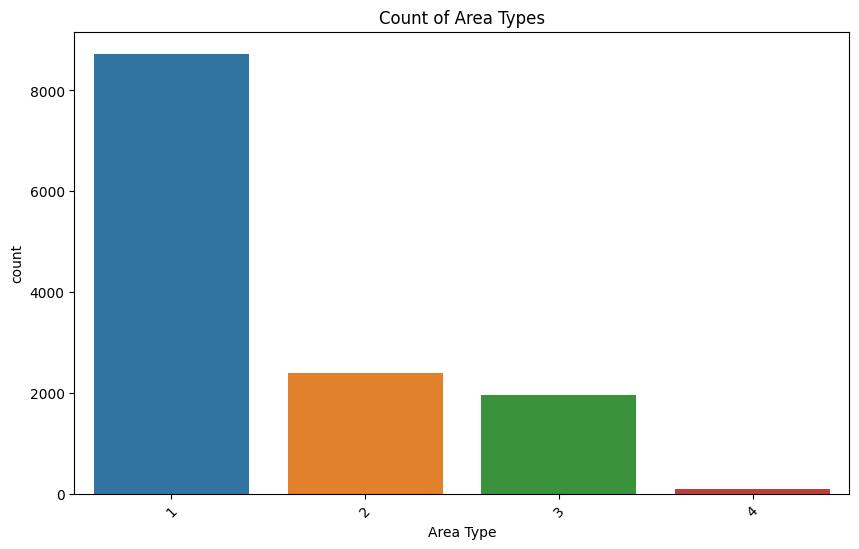

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='area_type', data=df)
plt.title('Count of Area Types')
plt.xlabel('Area Type')
plt.xticks(rotation=45)
plt.show()


### Visualization Area Type vs Price

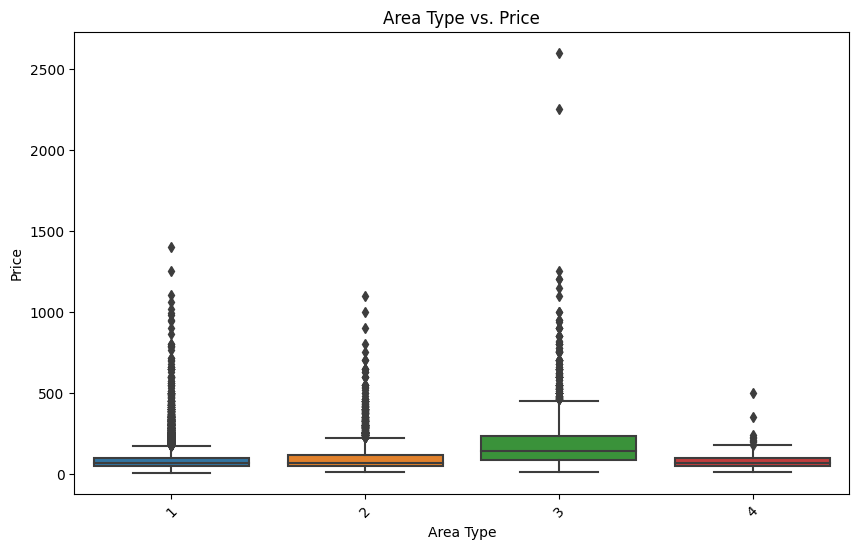

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='area_type', y='price', data=df)
plt.title('Area Type vs. Price')
plt.xlabel('Area Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [38]:
df = df.dropna()

In [39]:
x = df.drop('price',axis=1)
y = df['price']

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
x_train_scaled = stdScaler.fit_transform(x_train)
x_test_scaled = stdScaler.transform(x_test)

In [42]:
from sklearn.svm import SVR

In [54]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [55]:
svr.coef_

array([[ 1.37088524e+01, -3.54968110e+00,  7.10767503e-02,
         1.34810907e+01, -3.37301588e+00,  6.19593266e-12,
         6.19593266e-12]])

In [56]:
y_pred = svr.predict(x_test)

In [57]:
from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)
print(score)

-0.5196101998943623


# Hyperparameter tuning using GridSearchCV

In [1]:
parameter={'C':[0.1,1,10,100,1000],
          'gamma':[1,0.1,0.01,0.001,0.0001],
          'kernel':['linear','rbf','poly','sigmoid'],
          'epsilon':[0.1,0.2,0.3]}

In [48]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVR(),param_grid=parameter,refit=True,cv=5,verbose=3)

In [49]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=-0.098 total time=   5.3s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=-0.071 total time=   5.3s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=-0.112 total time=   5.3s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=-0.110 total time=   5.3s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=-0.086 total time=   5.3s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-0.084 total time=   5.3s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-0.062 total time=   5.3s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-0.102 total time=   5.3s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-0.099 total time=   5.3s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-0.076 total time=   5.3s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.01, kernel=rbf;, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [50]:
grid.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 0.0001, 'kernel': 'rbf'}

In [53]:
from sklearn.metrics import r2_score
y_pred2=grid.predict(x_test)
print(r2_score(y_test,y_pred2))

0.5400999895478913
